# Importing Neccessary Libraries

In [64]:
import numpy as np
import pandas as pd

import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_curve, auc, confusion_matrix,
    roc_auc_score, precision_recall_curve
)
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids, NearMiss
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier



import tensorflow as tf
from tensorflow import keras
from keras import layers

from scikeras.wrappers import KerasClassifier


# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Reading File

In [65]:
data = pd.read_csv('fraud_oracle.csv')
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


# Basic Exploration

In [66]:
data.shape

(15420, 33)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [68]:
data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [69]:
data.describe(include='object')

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


## - Uniuqe Values

In [70]:
for i in data.columns:
    print(i, end=" ")
    if data[i].nunique()>20:
        print(f'{data[i].unique()[:10]} . . .')
    else:
        print(f'{data[i].unique()}')
    print("="*50,end="\n\n")

Month ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']

WeekOfMonth [5 3 2 4 1]

DayOfWeek ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

Make ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

AccidentArea ['Urban' 'Rural']

DayOfWeekClaimed ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']

MonthClaimed ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']

WeekOfMonthClaimed [1 4 2 3 5]

Sex ['Female' 'Male']

MaritalStatus ['Single' 'Married' 'Widow' 'Divorced']

Age [21 34 47 65 27 20 36  0 30 42] . . .

Fault ['Policy Holder' 'Third Party']

PolicyType ['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils']

VehicleCategory ['S

## Missing Values

In [71]:
for i in data.columns:
    if i != 'FraudFound_P':
        missing_values = data[i].isna().sum() + len(data[data[i]=='none']) + len(data[data[i]=='0'])
        missing_percent = round((missing_values/len(data))*100,2)
        if missing_percent > 0:
            print(f'{i}: ',end="----------------------")
            print(f'{missing_percent}%')


DayOfWeekClaimed: ----------------------0.01%
MonthClaimed: ----------------------0.01%
Days_Policy_Accident: ----------------------0.36%
Days_Policy_Claim: ----------------------0.01%
PastNumberOfClaims: ----------------------28.22%
NumberOfSuppliments: ----------------------45.7%


- For `PastNumberOfClaims` and `NumberOfSuppliments` 'none' act as a category itself
- We will drop for rest of features

In [72]:
data.drop(data[data['MonthClaimed'] == '0'].index, inplace=True)
data.drop(data[data['DayOfWeekClaimed'] == '0'].index, inplace=True)

data.drop(data[data['Days_Policy_Accident'] == 'none'].index, inplace=True)
data.drop(data[data['Days_Policy_Claim'] == 'none'].index, inplace=True)

- We will drop `PolicyNumber` and `RepNumber` as they are irrelavant

In [73]:
data.drop(['PolicyNumber','RepNumber'],axis=1,inplace=True)

# Exploratory Data Analysis

- Lets see every feature's unique value distribution % wise

In [74]:
features = [i  for i in data.columns if data[i].dtype==object and i != 'FraudFound_P']

for i in features:
    print(i)
    print(round(data[i].value_counts()/len(data)*100,2))
    print("="*50)

Month
Jan    9.16
May    8.86
Mar    8.81
Jun    8.57
Oct    8.47
Dec    8.32
Apr    8.32
Feb    8.19
Jul    8.14
Sep    8.06
Nov    7.80
Aug    7.32
Name: Month, dtype: float64
DayOfWeek
Monday       16.97
Friday       15.84
Tuesday      14.92
Thursday     14.09
Wednesday    14.01
Saturday     12.87
Sunday       11.30
Name: DayOfWeek, dtype: float64
Make
Pontiac      24.88
Toyota       20.24
Honda        18.15
Mazda        15.28
Chevrolet    10.91
Accura        3.06
Ford          2.92
VW            1.84
Dodge         0.70
Saab          0.70
Mercury       0.54
Saturn        0.38
Nisson        0.20
BMW           0.10
Jaguar        0.04
Porche        0.03
Mecedes       0.03
Ferrari       0.01
Lexus         0.01
Name: Make, dtype: float64
AccidentArea
Urban    89.64
Rural    10.36
Name: AccidentArea, dtype: float64
DayOfWeekClaimed
Monday       24.39
Tuesday      21.90
Wednesday    19.12
Thursday     17.25
Friday       16.19
Saturday      0.82
Sunday        0.34
Name: DayOfWeekClaimed, dt

- After exploring we decide to remove those categories that are less than 7% in our data for each feature
- If after removing, there exists only one category we will drop that feature only

## Retaining Relevant Features based on frequecny

In [75]:
df = data.copy(deep=True)
for feature in features:
    value_percent = round(data[feature].value_counts()/len(data)*100,2)
    values_to_remove = value_percent[value_percent <=7].index
    df = df[~df[feature].isin(values_to_remove)]

for feature in features:
    unique_classes = df[feature].nunique()
    if unique_classes <= 1:
        df.drop(columns=[feature], inplace=True)


# Feature Engineering

In [76]:
def feature_engineering(df):

    binary_features = [i for i in df.columns if df[i].nunique() == 2]

    # Initialize a LabelEncoder instance
    label_encoder = LabelEncoder()

    # Iterate through each binary feature and apply label encoding
    for feature in binary_features:
        # Fit the label encoder and transform the feature values
        df[feature] = label_encoder.fit_transform(df[feature])


    '''
    This code calculates and applies frequency encoding to the specified columns (months_weeks)
    based on the occurrence of each category in the dataset for both classes of the target variable
    (FraudFound_P = 1 and FraudFound_P = 0). The calculated frequency encoding values are then mapped
    to the respective columns in the DataFrame. This technique can be used to encode categorical
    features based on the relative frequencies of their categories in different target classes.

    '''

    # List of columns for frequency encoding
    months_weeks = ['WeekOfMonth', 'Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed']

    # Iterate through each column for frequency encoding
    for column in months_weeks:
        # Calculate the frequency of each category for FraudFound_P=1 and FraudFound_P=0
        freq_1 = df[df['FraudFound_P'] == 1].groupby(column).size() / len(df)
        freq_0 = df[df['FraudFound_P'] == 0].groupby(column).size() / len(df)

        # Calculate the frequency encoding value using the formula (15*freq_1 + freq_0) / 2
        freq_encoding = (15 * freq_1 + freq_0) / 2

        # Map the calculated frequency encoding values to the respective column in the DataFrame
        df[column] = df[column].map(freq_encoding)


    #Encoding AgeOfPolicyHolder
    age_mapping = {
        '31 to 35': 0,
        '36 to 40': 1,
        '41 to 50': 2,
        '51 to 65': 3
    }

    df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].map(age_mapping)



    #Encoding VehiclePrice
    encoding_mp = {
        '20000 to 29000': 1,
        'more than 69000': 3,
        '30000 to 39000': 2,
        'less than 20000': 0
    }
    df['VehiclePrice'] = df['VehiclePrice'].map(encoding_mp)


    #Encoding AgeOfVehicle
    age_mapping = {
        '7 years': 2,
        '6 years': 1,
        'more than 7': 3,
        '5 years': 0
    }

    df['AgeOfVehicle'] = df['AgeOfVehicle'].map(age_mapping)


    #Encoding NumberOfSuppliments
    suppliments_mapping = {
        'none': 0,
        'more than 5': 3,
        '1 to 2': 1,
        '3 to 5': 2
    }

    df['NumberOfSuppliments'] = df['NumberOfSuppliments'].map(suppliments_mapping)


    # Encoding PastNumberOfClaims
    claim_mapping = {
        '2 to 4': 2,
        'none': 0,
        '1': 1,
        'more than 4': 3
    }

    df['PastNumberOfClaims'] = df['PastNumberOfClaims'].map(claim_mapping)


In [77]:
feature_engineering(df)

# Correlation Analysis

<Axes: >

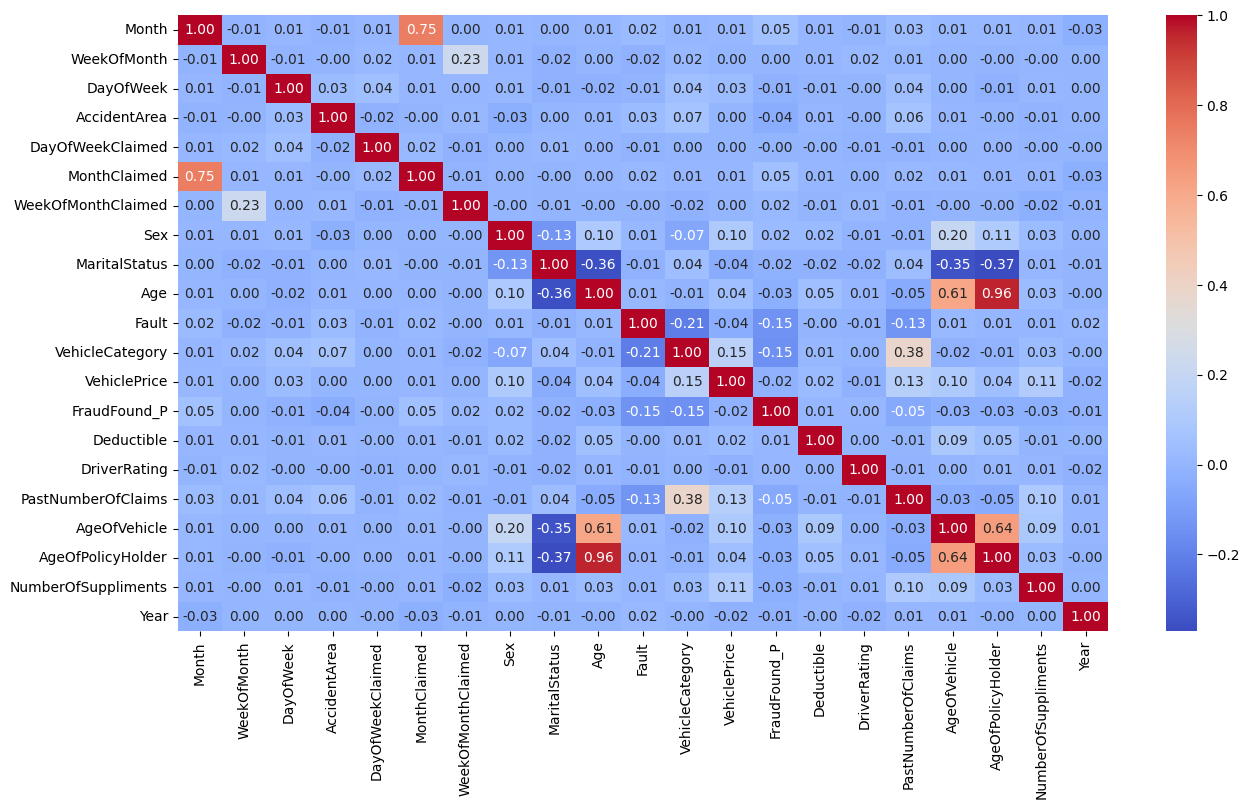

In [78]:
plt.figure(figsize=(15, 8))
df_numeric = df.copy(deep=True)
df_numeric = df_numeric.select_dtypes(include='number')
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True, fmt=".2f")

-  Age is highly correlated with Age of Policy Holder. We will remove it

In [79]:
df.drop('Age',axis=1,inplace=True)

## Correlation with Target

Text(0.5, 1.0, 'Correlation w.r.t FraudFound_P')

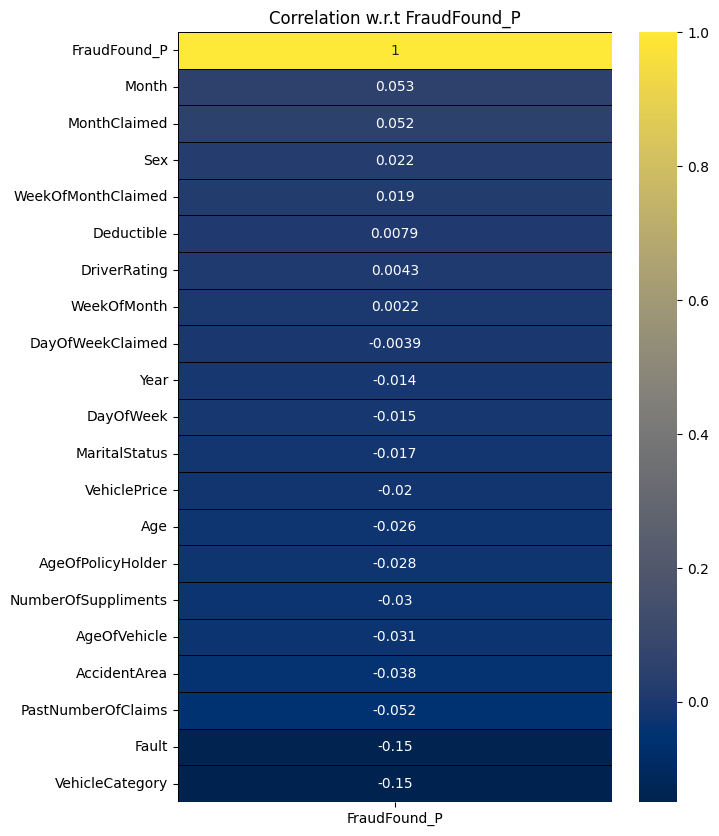

In [80]:
feautre_sel_df = df_numeric
corr = feautre_sel_df.corrwith(feautre_sel_df['FraudFound_P']).sort_values(ascending = False).to_frame()
corr.columns = ['FraudFound_P']
plt.subplots(figsize = (7,10))
sns.heatmap(corr,annot = True,cmap='cividis',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t FraudFound_P')

# Chi-Square Test

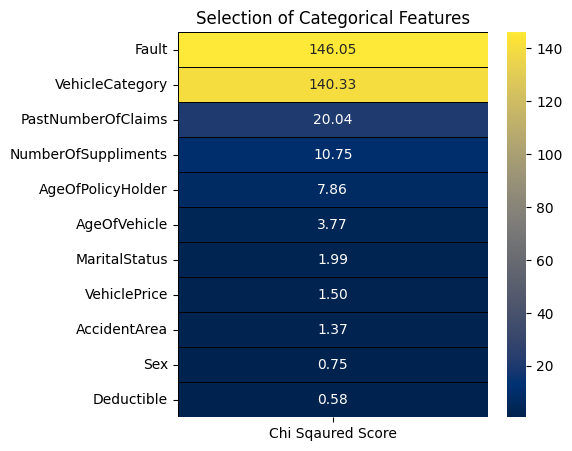

In [81]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif

categorical_features = ['AgeOfPolicyHolder','VehiclePrice','AgeOfVehicle','NumberOfSuppliments','PastNumberOfClaims','AccidentArea','Sex','MaritalStatus','Fault','VehicleCategory','Deductible']
features = df.loc[:,categorical_features]
target = pd.DataFrame(df['FraudFound_P'])

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Sqaured Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Sqaured Score'),annot = True,cmap = 'cividis',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

# ANOVA Test

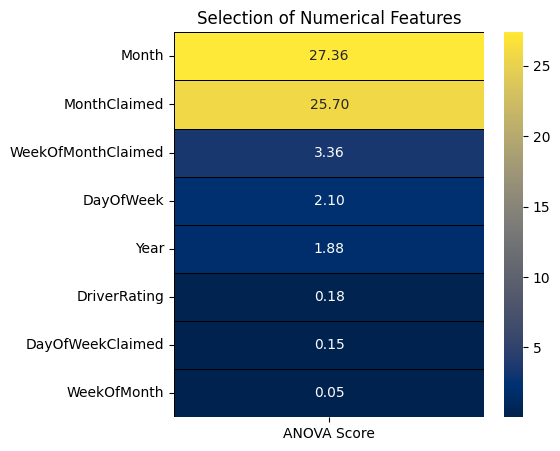

In [82]:
numerical_features = [i for i in df.columns if i not in categorical_features and i not in ['Make','PolicyType','BasePolicy','FraudFound_P']]
features = df.loc[:,numerical_features]
target = pd.DataFrame(df['FraudFound_P'])

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'cividis',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

# Final Dataset

In [83]:
def get_final_data(df):
    df.drop(['WeekOfMonth','DayOfWeekClaimed','DriverRating','Deductible','Sex','AccidentArea','VehiclePrice','MaritalStatus','AgeOfVehicle','Make'],axis=1,inplace=True)
    df = pd.get_dummies(df,columns=['PolicyType','BasePolicy'],drop_first=True)
    return df

df = get_final_data(df)

In [84]:
df.head()

,Month,DayOfWeek,MonthClaimed,WeekOfMonthClaimed,Fault,VehicleCategory,FraudFound_P,PastNumberOfClaims,AgeOfPolicyHolder,NumberOfSuppliments,Year,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,BasePolicy_Collision,BasePolicy_Liability
11,0.088346,0.145783,0.078703,0.061086,0,1,0,2,2,0,1994,0,1,0,1
17,0.063119,0.106484,0.073074,0.197019,1,0,0,0,0,1,1994,1,0,1,0
18,0.085166,0.119202,0.093558,0.061086,0,1,0,1,0,0,1994,0,1,0,1
19,0.076827,0.145783,0.093558,0.197019,1,1,0,2,0,3,1994,0,1,0,1
20,0.076827,0.130512,0.093558,0.197019,0,1,0,1,1,3,1994,0,1,0,1


In [85]:
df.shape

(9593, 15)

In [86]:
df.reset_index(inplace=True)

# Features and Labels

In [87]:
X = df.drop(['FraudFound_P'],axis=1)
y = df['FraudFound_P']

In [88]:
y.value_counts()

0    9093
1     500
Name: FraudFound_P, dtype: int64

# Splitting the data

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

In [90]:
y_train.value_counts()

0    7274
1     400
Name: FraudFound_P, dtype: int64

# Normalization

In [91]:
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

# ANN for Binary Classification

In [92]:
def ann():
    model = keras.Sequential([
    layers.Input(shape=(15,)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),  # Add dropout layer
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),  # Add dropout layer
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_ann(X_train, y_train, X_test, y_test, sampling_technique,class_weights=None,param_grid=None):

    model = KerasClassifier(build_fn=ann, epochs=10)

    model.fit(X_train, y_train, epochs=10, batch_size=32,class_weight=class_weights)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.7 else 0 for i in y_pred]


    cm = confusion_matrix(y_test, y_pred)

    rf_Recall = round(recall_score(y_test, y_pred)*100,2)
    rf_Precision = round(precision_score(y_test, y_pred)*100,2)
    rf_f1 = round(f1_score(y_test, y_pred)*100,2)
    rf_accuracy = round(accuracy_score(y_test, y_pred)*100,2)

    metrics = [sampling_technique, rf_Recall, rf_Precision, rf_f1, rf_accuracy]

    return metrics

# Training on different sampling techniques to handle imbalanced dataset

In [93]:
results = {}

#No Sampling
metrics = train_ann(X_train,y_train,X_test,y_test,'No Sampling',{0:1,1:18})
results[metrics[0]] = metrics[1:]

#Cost Sensitive
metrics = train_ann(X_train,y_train,X_test,y_test,'Cost Sensitive',{0:1,1:18})
results[metrics[0]] = metrics[1:]

#RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X_train, y_train)
metrics = train_ann(X_over, y_over, X_test, y_test,'RandomOverSampler',{0:1,1:18})
results[metrics[0]] = metrics[1:]


#RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train, y_train)
metrics = train_ann(X_under, y_under, X_test, y_test,'RandomUnderSampler',{0:1,1:18})
results[metrics[0]] = metrics[1:]



#SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
metrics = train_ann(X_smote, y_smote, X_test, y_test,'SMOTE',{0:1,1:18})
results[metrics[0]] = metrics[1:]



#TomekLinks
tomekU = TomekLinks()
X_underT, y_underT = tomekU.fit_resample(X_train, y_train)
metrics = train_ann(X_underT, y_underT, X_test, y_test,'TomekLinks',{0:1,1:18})
results[metrics[0]] = metrics[1:]


#SMOTETomek
smoteT = SMOTETomek(random_state=42)
X_smoteT, y_smoteT = smoteT.fit_resample(X_train, y_train)
metrics = train_ann(X_smoteT, y_smoteT, X_test, y_test,'SMOTETomek',{0:1,1:18})
results[metrics[0]] = metrics[1:]

# ADASYN (Adaptive Synthetic Sampling)
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
metrics_adasyn = train_ann(X_adasyn, y_adasyn, X_test, y_test, 'ADASYN',{0:1,1:18})
results[metrics_adasyn[0]] = metrics_adasyn[1:]

# Borderline-SMOTE
borderline_smote = BorderlineSMOTE(random_state=42)
X_borderline, y_borderline = borderline_smote.fit_resample(X_train, y_train)
metrics_borderline = train_ann(X_borderline, y_borderline, X_test, y_test, 'BorderlineSMOTE',{0:1,1:18})
results[metrics_borderline[0]] = metrics_borderline[1:]

# SMOTE-ENN (SMOTE + Edited Nearest Neighbors)
smote_enn = SMOTEENN(random_state=42)
X_smote_enn, y_smote_enn = smote_enn.fit_resample(X_train, y_train)
metrics_smote_enn = train_ann(X_smote_enn, y_smote_enn, X_test, y_test, 'SMOTEENN',{0:1,1:18})
results[metrics_smote_enn[0]] = metrics_smote_enn[1:]

cluster_centroids = ClusterCentroids(random_state=42)
X_cluster, y_cluster = cluster_centroids.fit_resample(X_train, y_train)
metrics_cluster = train_ann(X_cluster, y_cluster, X_test, y_test, 'ClusterCentroids',{0:1,1:18})
results[metrics_cluster[0]] = metrics_cluster[1:]

# NearMiss
near_miss = NearMiss(version=1)
X_near_miss, y_near_miss = near_miss.fit_resample(X_train, y_train)
metrics_near_miss = train_ann(X_near_miss, y_near_miss, X_test, y_test, 'NearMiss',{0:1,1:18})
results[metrics_near_miss[0]] = metrics_near_miss[1:]

Epoch 1/10
240/240 [==============================] - 2s 2ms/step - loss: 1.1059 - accuracy: 0.6806
Epoch 2/10
240/240 [==============================] - 1s 2ms/step - loss: 0.9543 - accuracy: 0.6466
Epoch 3/10
240/240 [==============================] - 1s 2ms/step - loss: 0.9246 - accuracy: 0.6553
Epoch 4/10
240/240 [==============================] - 1s 2ms/step - loss: 0.9078 - accuracy: 0.6553
Epoch 5/10
240/240 [==============================] - 1s 2ms/step - loss: 0.8887 - accuracy: 0.6512
Epoch 6/10
240/240 [==============================] - 1s 2ms/step - loss: 0.8870 - accuracy: 0.6585
Epoch 7/10
240/240 [==============================] - 1s 2ms/step - loss: 0.8835 - accuracy: 0.6577
Epoch 8/10
240/240 [==============================] - 1s 2ms/step - loss: 0.8789 - accuracy: 0.6518
Epoch 9/10
240/240 [==============================] - 1s 2ms/step - loss: 0.8769 - accuracy: 0.6530
Epoch 10/10
60/60 [==============================] - 0s 1ms/step
Epoch 1/10
240/240 [===============

# Results of ANN on different sampling techniques

In [94]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['F1 Score', 'Precision', 'Recall', 'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
No Sampling,96.0,12.34,21.87,64.25
Cost Sensitive,97.0,12.19,21.65,63.42
TomekLinks,97.0,12.16,21.60,63.31
BorderlineSMOTE,99.0,11.72,20.95,61.07
ADASYN,97.0,10.23,18.51,55.50
SMOTEENN,97.0,10.06,18.23,54.66
SMOTETomek,96.0,9.93,17.99,54.40
RandomOverSampler,99.0,9.65,17.58,51.64
SMOTE,99.0,9.50,17.34,50.81
RandomUnderSampler,100.0,7.00,13.09,30.80


# Funciton definition to train classifiers

In [95]:
def train_classifier(X_train, y_train, X_test, y_test, sampling_technique, model, param_grid=None, class_weights={0:1,1:18}):
    kf = StratifiedKFold(n_splits=5, shuffle=False)
    if class_weights:
        model.class_weight = class_weights

    if param_grid:
        clf = GridSearchCV(model, param_grid=param_grid, cv=kf, scoring='recall').fit(X_train, y_train)
    else:
        clf = model
        clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    classifier_Recall = round(recall_score(y_test, y_pred) * 100, 2)
    classifier_Precision = round(precision_score(y_test, y_pred) * 100, 2)
    classifier_f1 = round(f1_score(y_test, y_pred) * 100, 2)
    classifier_accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    metrics = [sampling_technique, classifier_Recall, classifier_Precision, classifier_f1, classifier_accuracy]

    return metrics



## Function definition to test different sampling techniques

In [96]:

def sampling_results(X_train,y_train,X_test,y_test,model, param_grid=None):
    results = {}

    #No Sampling
    metrics = train_classifier(X_train,y_train,X_test,y_test,'No Sampling',model, param_grid)
    results[metrics[0]] = metrics[1:]

    #Cost Sensitive
    metrics = train_classifier(X_train,y_train,X_test,y_test,'Cost Sensitive',model,param_grid)
    results[metrics[0]] = metrics[1:]

    #RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    X_over, y_over = ros.fit_resample(X_train, y_train)
    metrics = train_classifier(X_over, y_over, X_test, y_test,'RandomOverSampler',model, param_grid)
    results[metrics[0]] = metrics[1:]


    #RandomUnderSampler
    rus = RandomUnderSampler(random_state=42)
    X_under, y_under = rus.fit_resample(X_train, y_train)
    metrics = train_classifier(X_under, y_under, X_test, y_test,'RandomUnderSampler',model, param_grid)
    results[metrics[0]] = metrics[1:]



    #SMOTE
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X_train, y_train)
    metrics = train_classifier(X_smote, y_smote, X_test, y_test,'SMOTE',model, param_grid)
    results[metrics[0]] = metrics[1:]



    #TomekLinks
    tomekU = TomekLinks()
    X_underT, y_underT = tomekU.fit_resample(X_train, y_train)
    metrics = train_classifier(X_underT, y_underT, X_test, y_test,'TomekLinks',model, param_grid)
    results[metrics[0]] = metrics[1:]


    #SMOTETomek
    smoteT = SMOTETomek(random_state=42)
    X_smoteT, y_smoteT = smoteT.fit_resample(X_train, y_train)
    metrics = train_classifier(X_smoteT, y_smoteT, X_test, y_test,'SMOTETomek',model, param_grid)
    results[metrics[0]] = metrics[1:]

    # ADASYN (Adaptive Synthetic Sampling)
    adasyn = ADASYN(random_state=42)
    X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
    metrics_adasyn = train_classifier(X_adasyn, y_adasyn, X_test, y_test, 'ADASYN',model, param_grid)
    results[metrics_adasyn[0]] = metrics_adasyn[1:]

    # Borderline-SMOTE
    borderline_smote = BorderlineSMOTE(random_state=42)
    X_borderline, y_borderline = borderline_smote.fit_resample(X_train, y_train)
    metrics_borderline = train_classifier(X_borderline, y_borderline, X_test, y_test, 'BorderlineSMOTE',model, param_grid)
    results[metrics_borderline[0]] = metrics_borderline[1:]

    # SMOTE-ENN (SMOTE + Edited Nearest Neighbors)
    smote_enn = SMOTEENN(random_state=42)
    X_smote_enn, y_smote_enn = smote_enn.fit_resample(X_train, y_train)
    metrics_smote_enn = train_classifier(X_smote_enn, y_smote_enn, X_test, y_test, 'SMOTEENN',model, param_grid)
    results[metrics_smote_enn[0]] = metrics_smote_enn[1:]

    cluster_centroids = ClusterCentroids(random_state=42)
    X_cluster, y_cluster = cluster_centroids.fit_resample(X_train, y_train)
    metrics_cluster = train_classifier(X_cluster, y_cluster, X_test, y_test, 'ClusterCentroids',model, param_grid)
    results[metrics_cluster[0]] = metrics_cluster[1:]

    # NearMiss
    near_miss = NearMiss(version=1)
    X_near_miss, y_near_miss = near_miss.fit_resample(X_train, y_train)
    metrics_near_miss = train_classifier(X_near_miss, y_near_miss, X_test, y_test, 'NearMiss',model, param_grid)
    results[metrics_near_miss[0]] = metrics_near_miss[1:]


    # 33% RandomOverSampler + TomekLinks
    ros = RandomOverSampler(random_state=42, sampling_strategy=0.33)
    X_ensemble, y_ensemble = ros.fit_resample(X_train, y_train)
    tomeklinks = TomekLinks()
    X_ensemble, y_ensemble = tomeklinks.fit_resample(X_ensemble, y_ensemble)
    metrics_ROS_TomeKLinks = train_classifier(X_ensemble,y_ensemble,X_test,y_test, '33% ROS + TomeKLinks ',model, param_grid)
    results[metrics_ROS_TomeKLinks[0]] = metrics_ROS_TomeKLinks[1:]


    sampling_techniques = list(results.keys())
    metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
    results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
    sorted_df = results_df.sort_values(by=['F1 Score', 'Precision', 'Recall', 'Accuracy'], ascending=False)
    return sorted_df

# Random Forest Classifier

In [97]:
model = RandomForestClassifier()
randomForest_df = sampling_results(X_train,y_train,X_test,y_test,model)
randomForest_df

,Recall,Precision,F1 Score,Accuracy
SMOTEENN,34.0,21.38,26.25,90.05
RandomUnderSampler,89.0,15.01,25.69,73.16
33% ROS + TomeKLinks,13.0,50.00,20.63,94.79
SMOTETomek,11.0,33.33,16.54,94.22
RandomOverSampler,10.0,47.62,16.53,94.74
SMOTE,11.0,30.56,16.18,94.06
ADASYN,11.0,30.56,16.18,94.06
ClusterCentroids,99.0,8.20,15.14,42.16
BorderlineSMOTE,10.0,27.03,14.60,93.90
Cost Sensitive,6.0,85.71,11.21,95.05


# XGBoostClassfier

In [98]:
model = XGBClassifier()
xgb_df = sampling_results(X_train,y_train,X_test,y_test,model)
xgb_df

,Recall,Precision,F1 Score,Accuracy
33% ROS + TomeKLinks,79.0,66.95,72.48,96.87
RandomOverSampler,79.0,61.72,69.30,96.35
No Sampling,44.0,70.97,54.32,96.14
Cost Sensitive,44.0,70.97,54.32,96.14
SMOTEENN,61.0,48.03,53.74,94.53
TomekLinks,45.0,64.29,52.94,95.83
BorderlineSMOTE,42.0,71.19,52.83,96.09
ADASYN,42.0,70.00,52.50,96.04
SMOTETomek,41.0,71.93,52.23,96.09
SMOTE,39.0,76.47,51.66,96.20


# CatBoost Classifier


In [99]:
model = CatBoostClassifier()
cat_df = sampling_results(X_train,y_train,X_test,y_test,model)
cat_df

Streaming output truncated to the last 5000 lines.
4:	learn: 0.5386088	total: 35ms	remaining: 6.96s
5:	learn: 0.5212934	total: 42ms	remaining: 6.95s
6:	learn: 0.5055380	total: 49.1ms	remaining: 6.96s
7:	learn: 0.4914907	total: 56ms	remaining: 6.95s
8:	learn: 0.4705218	total: 63ms	remaining: 6.94s
9:	learn: 0.4520740	total: 69.9ms	remaining: 6.92s
10:	learn: 0.4373159	total: 76.9ms	remaining: 6.92s
11:	learn: 0.4279416	total: 83.9ms	remaining: 6.91s
12:	learn: 0.4170106	total: 91.4ms	remaining: 6.94s
13:	learn: 0.4065657	total: 98.7ms	remaining: 6.95s
14:	learn: 0.3935696	total: 109ms	remaining: 7.13s
15:	learn: 0.3843399	total: 116ms	remaining: 7.16s
16:	learn: 0.3761921	total: 124ms	remaining: 7.17s
17:	learn: 0.3709000	total: 131ms	remaining: 7.15s
18:	learn: 0.3660975	total: 138ms	remaining: 7.15s
19:	learn: 0.3573675	total: 147ms	remaining: 7.18s
20:	learn: 0.3538333	total: 154ms	remaining: 7.18s
21:	learn: 0.3496066	total: 162ms	remaining: 7.19s
22:	learn: 0.3390708	total: 169ms	r

,Recall,Precision,F1 Score,Accuracy
33% ROS + TomeKLinks,87.0,67.97,76.32,97.19
RandomOverSampler,89.0,57.42,69.80,95.99
SMOTEENN,58.0,47.93,52.49,94.53
ADASYN,39.0,72.22,50.65,96.04
BorderlineSMOTE,35.0,71.43,46.98,95.88
SMOTETomek,35.0,68.63,46.36,95.78
TomekLinks,33.0,76.74,46.15,95.99
No Sampling,32.0,76.19,45.07,95.94
Cost Sensitive,32.0,76.19,45.07,95.94
SMOTE,33.0,70.21,44.90,95.78


# LGBMClassifier

In [100]:
model = LGBMClassifier()
lgbm_df = sampling_results(X_train,y_train,X_test,y_test,model)
lgbm_df

[LightGBM] [Info] Number of positive: 400, number of negative: 7274
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 318
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497444 -> initscore=-0.010225
[LightGBM] [Info] Start training from score -0.010225
[LightGBM] [Info] Number of positive: 400, number of negative: 7274
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 318
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 15
[LightGBM] [Info] [binary:Bo

,Recall,Precision,F1 Score,Accuracy
No Sampling,91.0,50.56,65.00,94.89
Cost Sensitive,91.0,50.56,65.00,94.89
SMOTETomek,82.0,44.81,57.95,93.80
ADASYN,86.0,43.43,57.72,93.43
TomekLinks,89.0,41.98,57.05,93.02
BorderlineSMOTE,85.0,40.48,54.84,92.70
33% ROS + TomeKLinks,94.0,36.43,52.51,91.14
RandomOverSampler,95.0,34.80,50.94,90.46
SMOTE,79.0,36.74,50.16,91.82
SMOTEENN,88.0,25.36,39.37,85.88


# AdaBoostClassifier

In [101]:
model = AdaBoostClassifier()
ada_df = sampling_results(X_train,y_train,X_test,y_test,model)
ada_df

,Recall,Precision,F1 Score,Accuracy
BorderlineSMOTE,41.0,16.21,23.23,85.88
RandomOverSampler,95.0,13.16,23.11,67.07
SMOTEENN,75.0,13.54,22.94,73.74
RandomUnderSampler,89.0,13.11,22.85,68.68
33% ROS + TomeKLinks,33.0,15.71,21.29,87.29
SMOTE,41.0,13.53,20.35,83.27
SMOTETomek,41.0,13.18,19.95,82.86
ADASYN,31.0,13.08,18.40,85.67
ClusterCentroids,100.0,6.87,12.85,29.34
NearMiss,71.0,4.85,9.07,25.85


from matplotlib import pyplot as plt
ada_df['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ada_df['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ada_df['F1 Score'].plot(kind='hist', bins=20, title='F1 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ada_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ada_df.plot(kind='scatter', x='Recall', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ada_df.plot(kind='scatter', x='Precision', y='F1 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ada_df.plot(kind='scatter', x='F1 Score', y='Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ada_df['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ada_df['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ada_df['F1 Score'].plot(kind='line', figsize=(8, 4), title='F1 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ada_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

# EasyEnsembleClassifier

In [102]:
model = EasyEnsembleClassifier(n_estimators=10, random_state=42)
esyeb_df = sampling_results(X_train,y_train,X_test,y_test,model)
esyeb_df


,Recall,Precision,F1 Score,Accuracy
SMOTEENN,72.0,14.43,24.04,76.29
33% ROS + TomeKLinks,94.0,13.30,23.30,67.74
BorderlineSMOTE,41.0,16.21,23.23,85.88
RandomOverSampler,95.0,13.16,23.11,67.07
RandomUnderSampler,89.0,13.11,22.85,68.68
No Sampling,95.0,12.63,22.30,65.50
Cost Sensitive,95.0,12.63,22.30,65.50
TomekLinks,96.0,12.47,22.07,64.67
SMOTE,41.0,13.53,20.35,83.27
SMOTETomek,41.0,13.18,19.95,82.86


# BalancedRandomForestClassifier

In [103]:
model = BalancedRandomForestClassifier(n_estimators=10, random_state=42)
balrf_df = sampling_results(X_train,y_train,X_test,y_test,model)
balrf_df

,Recall,Precision,F1 Score,Accuracy
33% ROS + TomeKLinks,43.0,33.33,37.55,92.55
TomekLinks,87.0,16.35,27.53,76.13
RandomUnderSampler,82.0,16.05,26.84,76.71
No Sampling,81.0,14.92,25.19,74.93
Cost Sensitive,81.0,14.92,25.19,74.93
SMOTEENN,28.0,19.72,23.14,90.31
RandomOverSampler,14.0,42.42,21.05,94.53
SMOTE,14.0,37.84,20.44,94.32
BorderlineSMOTE,12.0,28.57,16.90,93.85
SMOTETomek,11.0,24.44,15.17,93.59
